In [1]:
import numpy as np 
from qiskit import *

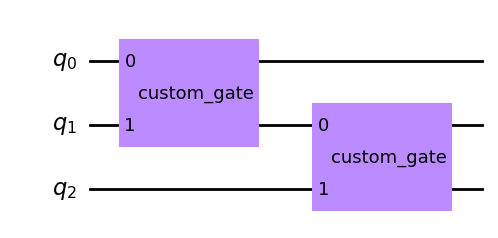

In [2]:
from qiskit.circuit import Gate
custom_gate = Gate('custom_gate', num_qubits=2, params=[])

# Register of qubits
qr = QuantumRegister(3,'q')
circ = QuantumCircuit(qr)
circ.append(custom_gate, [qr[0],qr[1]])
circ.append(custom_gate,[qr[1],qr[2]])

circ.draw('mpl')

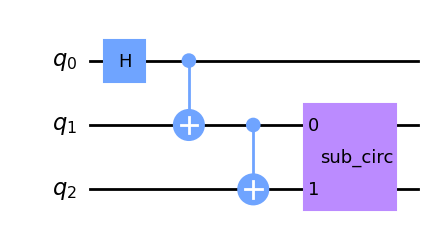

In [4]:
sub_qr = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_qr, name='sub_circ')
sub_circ.h(sub_qr[0])
sub_circ.crz(1,sub_qr[0], sub_qr[1])
sub_circ.barrier()
sub_circ.id(sub_qr[1])
sub_circ.u(1,2,-2,sub_qr[0])

# Convert whole thing to a gate
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3,'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0],qr[1])
circ.cx(qr[1],qr[2])
circ.append(sub_inst, [qr[1],qr[2]])

circ.draw('mpl')

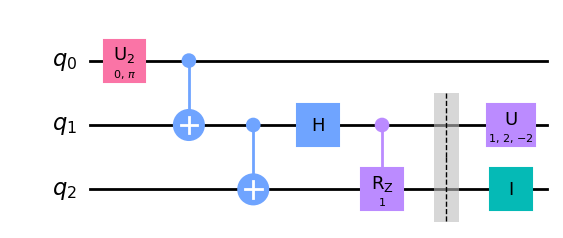

In [5]:
decomposed_circ = circ.decompose()
decomposed_circ.draw('mpl')

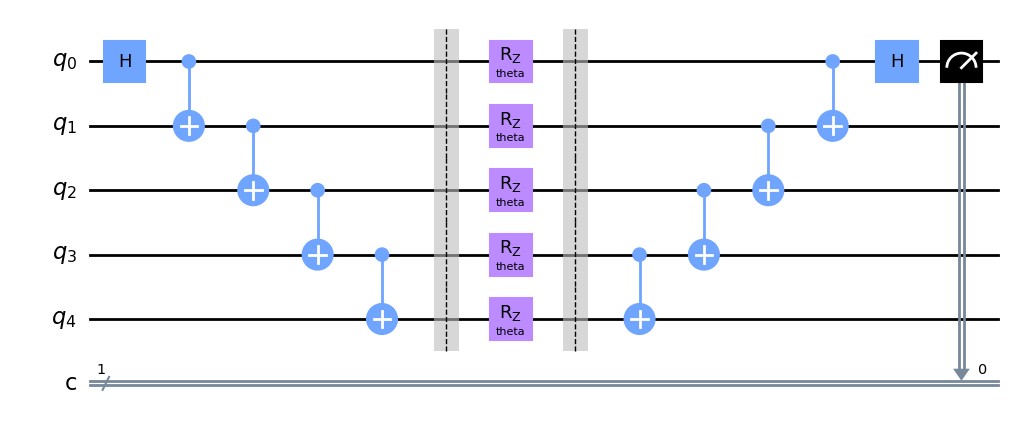

In [7]:
from qiskit.circuit import Parameter

theta = Parameter('theta')

n=5
qc = QuantumCircuit(5,1)
qc.h(0)
for i in range(n-1):
    qc.cx(i,i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i,i+1)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

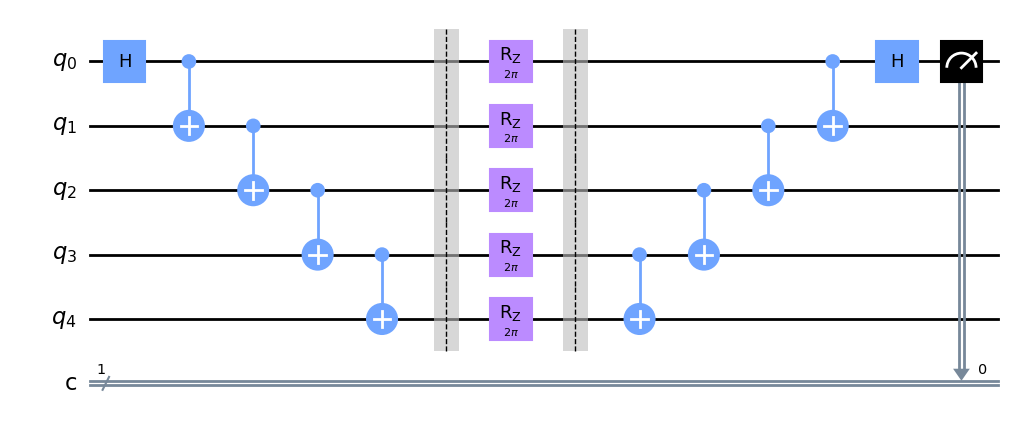

In [8]:
theta_range = np.linspace(0,2*np.pi, 128)

circuits = [qc.bind_parameters({theta:theta_val}) for theta_val in theta_range]

circuits[-1].draw('mpl')

In [10]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(circuits, backend))
counts = job.result().get_counts()

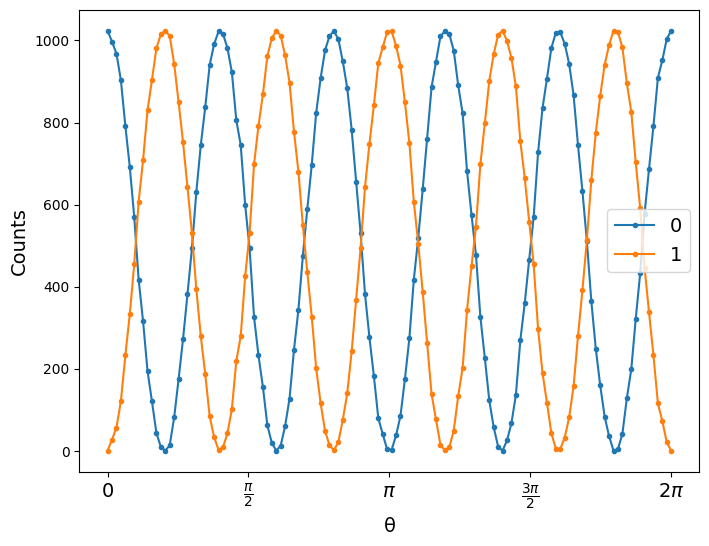

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)

It is quicker to compile parameterized circuits and then bind their parameters than to bind and then compile